In [1]:
%load_ext autoreload
%autoreload 2

import pickle
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Activation, BatchNormalization
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import Adadelta
from tensorflow.keras.utils import to_categorical

import mnist

SEED = 42
np.random.seed(SEED)
tf.random.set_seed(SEED)

In [2]:
# import train and test data
(X_train, y_train), (X_dev, y_dev) = mnist.load_data()

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 3s 43us/sample - loss: 0.6023 - accuracy: 0.8497 - val_loss: 0.2757 - val_accuracy: 0.9203
Epoch 2/20
60000/60000 [==============================] - 2s 34us/sample - loss: 0.2568 - accuracy: 0.9262 - val_loss: 0.2309 - val_accuracy: 0.9316
Epoch 3/20
60000/60000 [==============================] - 2s 34us/sample - loss: 0.2078 - accuracy: 0.9403 - val_loss: 0.1827 - val_accuracy: 0.9490
Epoch 4/20
60000/60000 [==============================] - 2s 34us/sample - loss: 0.1744 - accuracy: 0.9502 - val_loss: 0.1548 - val_accuracy: 0.9560
Epoch 5/20
60000/60000 [==============================] - 2s 33us/sample - loss: 0.1495 - accuracy: 0.9575 - val_loss: 0.1336 - val_accuracy: 0.9622
Epoch 6/20
60000/60000 [==============================] - 2s 34us/sample - loss: 0.1302 - accuracy: 0.9628 - val_loss: 0.1223 - val_accuracy: 0.9643
Epoch 7/20
60000/60000 [==============================] 

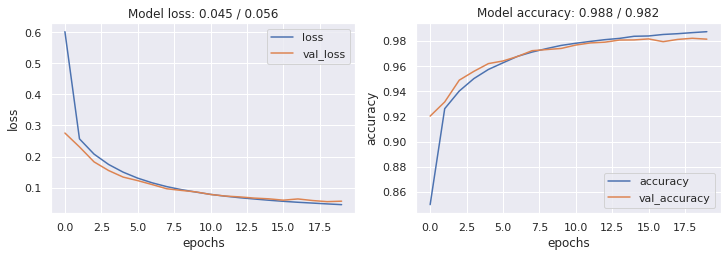

In [5]:
parameters = dict(
    batch_size=128,
    n_epochs=20,
)

# Model creation
model1 = Sequential()
model1.add(Conv2D(32, kernel_size=(3, 3), activation="relu", input_shape=(28, 28, 1)))
model1.add(MaxPooling2D(pool_size=(2, 2)))
model1.add(Flatten())
model1.add(Dense(100, activation="relu"))
model1.add(Dense(10, activation="softmax"))

model1.compile(
    loss=categorical_crossentropy,
    optimizer=Adadelta(learning_rate=0.1),
    metrics=["accuracy"]
)
history1 = model1.fit(
    X_train,
    y_train,
    batch_size=parameters["batch_size"],
    epochs=parameters["n_epochs"],
    verbose=1,
    validation_data=(X_dev, y_dev),
)
mnist.plot_history(history1)

In [6]:
X_test, y_test = mnist.load_handwritten("handwritten.pkl")
score = model1.evaluate(X_test, y_test, verbose=0)
print(f"Test loss of own handwritten digits: {score[0]:.3f}")
print(f"Test accuracy: {score[1]:.3f}")

Test loss of own handwritten digits: 0.545
Test accuracy: 0.850


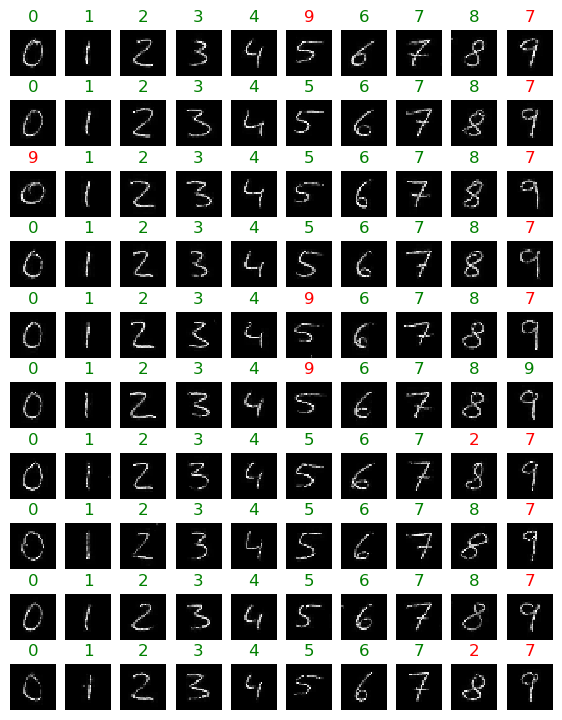

In [14]:
sns.reset_defaults()
y_pred = model1.predict_classes(X_test.reshape(-1, 28, 28, 1))

fig = plt.figure(figsize=(7, 9))

for i in range(100):
    ax = fig.add_subplot(10, 10, i+1)
    plt.imshow(X_test[i].reshape(28, 28), cmap="gray")
    plt.axis("off")
    correct = y_pred[i] == np.argmax(y_test[i])
    plt.title(y_pred[i], color="green" if correct else "red");

## Model with two Convolutional layers

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 3s 54us/sample - loss: 0.4675 - accuracy: 0.8686 - val_loss: 0.2168 - val_accuracy: 0.9356
Epoch 2/20
60000/60000 [==============================] - 3s 43us/sample - loss: 0.1908 - accuracy: 0.9439 - val_loss: 0.1634 - val_accuracy: 0.9501
Epoch 3/20
60000/60000 [==============================] - 3s 43us/sample - loss: 0.1317 - accuracy: 0.9609 - val_loss: 0.1044 - val_accuracy: 0.9688
Epoch 4/20
60000/60000 [==============================] - 3s 43us/sample - loss: 0.0995 - accuracy: 0.9710 - val_loss: 0.0825 - val_accuracy: 0.9753
Epoch 5/20
60000/60000 [==============================] - 3s 43us/sample - loss: 0.0794 - accuracy: 0.9771 - val_loss: 0.0690 - val_accuracy: 0.9785
Epoch 6/20
60000/60000 [==============================] - 3s 43us/sample - loss: 0.0667 - accuracy: 0.9804 - val_loss: 0.0667 - val_accuracy: 0.9786
Epoch 7/20
60000/60000 [==============================] 

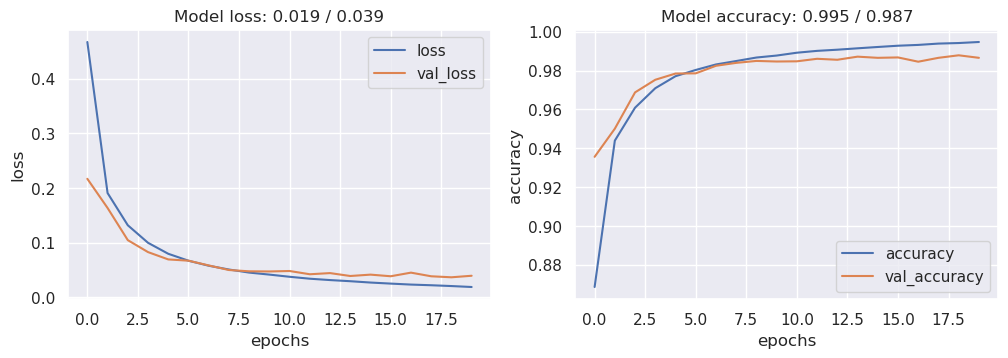

In [15]:
parameters = dict(
    batch_size=128,
    n_epochs=20,
)

# Model creation
model2 = Sequential()
model2.add(Conv2D(32, kernel_size=(3, 3), activation="relu", input_shape=(28, 28, 1)))
model2.add(Conv2D(32, kernel_size=(3, 3), activation="relu"))
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Flatten())
model2.add(Dense(100, activation="relu"))
model2.add(Dense(10, activation="softmax"))

model2.compile(
    loss=categorical_crossentropy,
    optimizer=Adadelta(learning_rate=0.1),
    metrics=["accuracy"]
)
history2 = model2.fit(
    X_train,
    y_train,
    batch_size=parameters["batch_size"],
    epochs=parameters["n_epochs"],
    verbose=1,
    validation_data=(X_dev, y_dev),
)
mnist.plot_history(history2)

In [16]:
score = model2.evaluate(X_test, y_test, verbose=0)
print(f"Test loss of own handwritten digits: {score[0]:.3f}")
print(f"Test accuracy: {score[1]:.3f}")

Test loss of own handwritten digits: 0.421
Test accuracy: 0.870


## Model with Dropout

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 3s 56us/sample - loss: 0.6891 - accuracy: 0.7879 - val_loss: 0.2254 - val_accuracy: 0.9358
Epoch 2/20
60000/60000 [==============================] - 3s 45us/sample - loss: 0.3282 - accuracy: 0.9010 - val_loss: 0.1650 - val_accuracy: 0.9490
Epoch 3/20
60000/60000 [==============================] - 3s 45us/sample - loss: 0.2554 - accuracy: 0.9251 - val_loss: 0.1292 - val_accuracy: 0.9607
Epoch 4/20
60000/60000 [==============================] - 3s 45us/sample - loss: 0.2100 - accuracy: 0.9386 - val_loss: 0.1043 - val_accuracy: 0.9695
Epoch 5/20
60000/60000 [==============================] - 3s 45us/sample - loss: 0.1799 - accuracy: 0.9477 - val_loss: 0.0896 - val_accuracy: 0.9717
Epoch 6/20
60000/60000 [==============================] - 3s 45us/sample - loss: 0.1584 - accuracy: 0.9530 - val_loss: 0.0785 - val_accuracy: 0.9751
Epoch 7/20
60000/60000 [==============================] 

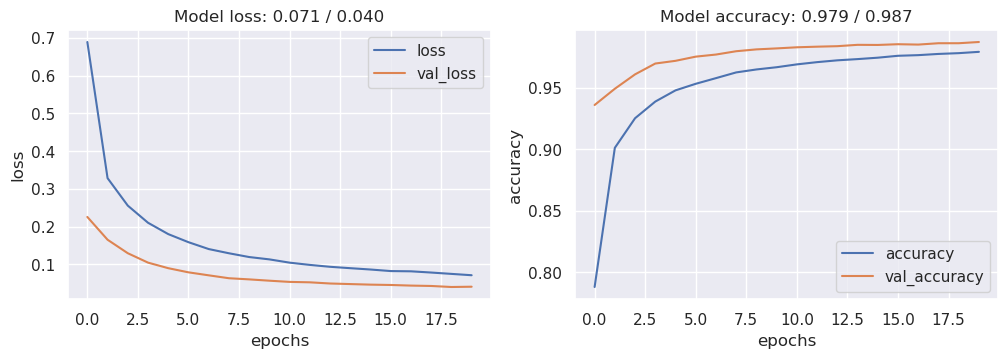

In [17]:
parameters = dict(
    batch_size=128,
    n_epochs=20,
)

# Model creation
model3 = Sequential()
model3.add(Conv2D(32, kernel_size=(3, 3), activation="relu", input_shape=(28, 28, 1)))
model3.add(Conv2D(32, kernel_size=(3, 3), activation="relu"))
model3.add(MaxPooling2D(pool_size=(2, 2)))
model3.add(Dropout(0.25))
model3.add(Flatten())
model3.add(Dense(128))
model3.add(Dropout(0.5))
model3.add(Activation("relu"))
model3.add(Dense(10, activation="softmax"))

model3.compile(
    loss=categorical_crossentropy,
    optimizer=Adadelta(learning_rate=0.1),
    metrics=["accuracy"]
)
history3 = model3.fit(
    X_train,
    y_train,
    batch_size=parameters["batch_size"],
    epochs=parameters["n_epochs"],
    verbose=1,
    validation_data=(X_dev, y_dev),
)
mnist.plot_history(history3)

In [11]:
score = model3.evaluate(X_test, y_test, verbose=0)
print(f"Test loss of own handwritten digits: {score[0]:.3f}")
print(f"Test accuracy: {score[1]:.3f}")

Test loss of own handwritten digits: 0.610
Test accuracy: 0.820


## Model with Batch Normalization

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 5s 79us/sample - loss: 0.6015 - accuracy: 0.8371 - val_loss: 0.6989 - val_accuracy: 0.9304
Epoch 2/20
60000/60000 [==============================] - 3s 55us/sample - loss: 0.2244 - accuracy: 0.9482 - val_loss: 0.1385 - val_accuracy: 0.9753
Epoch 3/20
60000/60000 [==============================] - 3s 55us/sample - loss: 0.1557 - accuracy: 0.9626 - val_loss: 0.0987 - val_accuracy: 0.9801
Epoch 4/20
60000/60000 [==============================] - 3s 55us/sample - loss: 0.1229 - accuracy: 0.9700 - val_loss: 0.0801 - val_accuracy: 0.9824
Epoch 5/20
60000/60000 [==============================] - 3s 55us/sample - loss: 0.1038 - accuracy: 0.9745 - val_loss: 0.0670 - val_accuracy: 0.9843
Epoch 6/20
60000/60000 [==============================] - 3s 55us/sample - loss: 0.0924 - accuracy: 0.9765 - val_loss: 0.0566 - val_accuracy: 0.9856
Epoch 7/20
60000/60000 [==============================] 

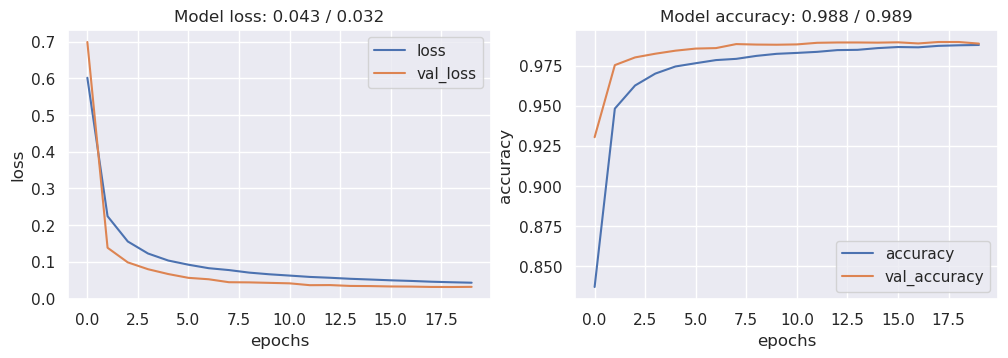

In [18]:
parameters = dict(
    batch_size=128,
    n_epochs=20,
)

# Model creation
model4 = Sequential()
model4.add(Conv2D(32, kernel_size=(3, 3), input_shape=(28, 28, 1)))
model4.add(BatchNormalization())
model4.add(Activation("relu"))
model4.add(Conv2D(32, kernel_size=(3, 3)))
model4.add(BatchNormalization())
model4.add(Activation("relu"))
model4.add(MaxPooling2D(pool_size=(2, 2)))
model4.add(Dropout(0.25))
model4.add(Flatten())
model4.add(Dense(128))
model4.add(Dropout(0.5))
model4.add(BatchNormalization())
model4.add(Activation("relu"))
model4.add(Dense(10, activation="softmax"))

model4.compile(
    loss=categorical_crossentropy,
    optimizer=Adadelta(learning_rate=0.1),
    metrics=["accuracy"]
)
history4 = model4.fit(
    X_train,
    y_train,
    batch_size=parameters["batch_size"],
    epochs=parameters["n_epochs"],
    verbose=1,
    validation_data=(X_dev, y_dev),
)
mnist.plot_history(history4)

In [20]:
score = model4.evaluate(X_test, y_test, verbose=0)
print(f"Test loss of own handwritten digits: {score[0]:.3f}")
print(f"Test accuracy: {score[1]:.3f}")

Test loss of own handwritten digits: 0.695
Test accuracy: 0.810


## Model comparison

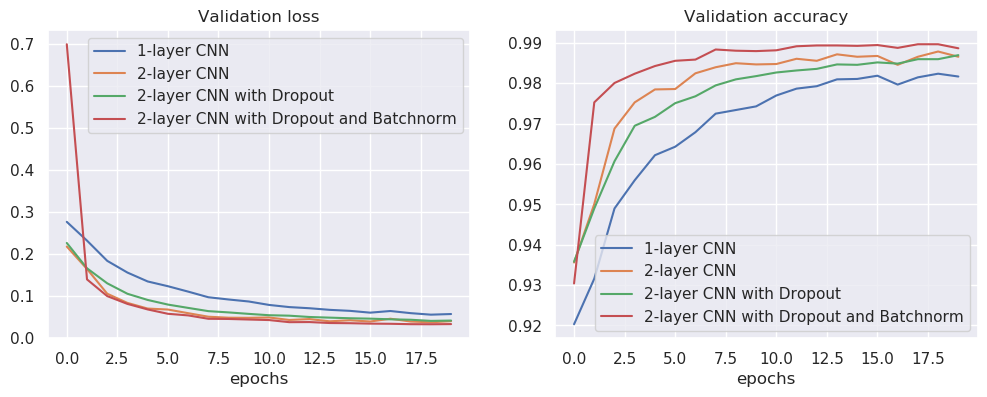

In [41]:
sns.set()
fig = plt.figure(figsize=(12, 4))

fig.add_subplot(121)
sns.lineplot(data=np.array(history1.history["val_loss"]), label="1-layer CNN")
sns.lineplot(data=np.array(history2.history["val_loss"]), label="2-layer CNN")
sns.lineplot(data=np.array(history3.history["val_loss"]), label="2-layer CNN with Dropout")
sns.lineplot(data=np.array(history4.history["val_loss"]), label="2-layer CNN with Dropout and Batchnorm")
plt.title("Validation loss")
plt.xlabel("epochs")

fig.add_subplot(122)
sns.lineplot(data=np.array(history1.history["val_accuracy"]), label="1-layer CNN")
sns.lineplot(data=np.array(history2.history["val_accuracy"]), label="2-layer CNN")
sns.lineplot(data=np.array(history3.history["val_accuracy"]), label="2-layer CNN with Dropout")
sns.lineplot(data=np.array(history4.history["val_accuracy"]), label="2-layer CNN with Dropout and Batchnorm")
plt.title("Validation accuracy")
plt.xlabel("epochs")

plt.show()